# Nearest Neighbors Algorithm (KNN) variation
In this notebook, is presented the results of a variation of KNN alghorigthm from https://github.com/rushter/MLAlgorithms.

In [4]:
import auxiliarfunctions as af

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import knn.knn as neighbors
import knn.knn_modified as neighbors_modified

### Loading the Datasets
The datasets used in this notebook are extracted from OpenMl

In [5]:
datasets = [] # list of datasets that store tuples X, y
datasets_names = [] # list of datasets names
datatraintest = [] # list of tuples X_train, X_test, y_train, y_test

# push the with id 37 and 163 into the datasets list
datasets.append(af.fetch_and_prepare_dataset(37))
datasets_names.append("diabetes")

# datasets.append(af.fetch_and_prepare_dataset(42175))
# datasets_names.append("CreditCardFraudDetection")

# datasets.append(af.fetch_and_prepare_dataset(43465))
# datasets_names.append("Boston-house-price-data")

# datasets.append(af.fetch_and_prepare_dataset(61))
# datasets_names.append("Iris")

# datasets.append(af.fetch_and_prepare_dataset(40983))
# datasets_names.append("wilt")

# datasets.append(af.fetch_and_prepare_dataset(44))
# datasets_names.append("spambase")


# Append the split data as a dictionary
for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset[0], dataset[1], test_size=0.2)
    datatraintest.append({'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test})

In [ ]:
print(len(datatraintest))

1


To help visualize the data, we used PCA to reduce the dimensionality of the data to 2D

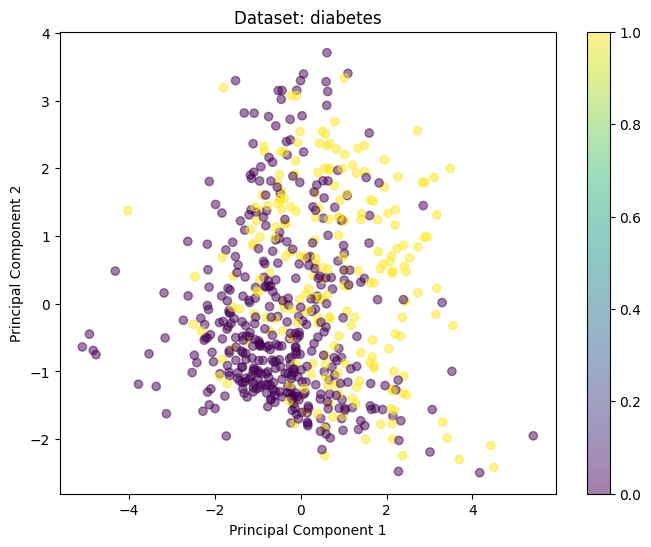

In [6]:
for dataset , dataset_name in zip(datatraintest, datasets_names):
    af.apply_pca_and_plot_with_encoding(dataset['X_train'], dataset['y_train'], dataset_name)

### Classification
The classification is done using the KNN algorithm, we still used the unmofied version of the algorithm to classify the data so we can have a baseline to compare the results with. 

In [7]:
# list of classifiers
classifiers = [neighbors.KNNClassifier(k=10), neighbors_modified.KNNClassifier(k=10)]
classifiers_names = ['KNN', 'KNN Modified']

In [8]:
models = [] # list of models

In [9]:
def classify_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    models.append(classifier.fit(X_train, y_train))
    y_pred = classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

## Results
Here's the coparatison of accuracy between the two algorithms

In [10]:
# iterate over the classifiers
for i in range(len(datasets)):
    for classifier, classifier_name in zip(classifiers, classifiers_names):
        data = datatraintest[i]
        X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']
        accuracy = classify_and_evaluate(classifier, X_train, X_test, y_train, y_test)
        print(f'Accuracy for dataset {datasets_names[i]} with classifier {classifier_name}: {accuracy}')

614
154
614
154
Accuracy for dataset diabetes with classifier KNN: 0.7857142857142857
614
154
614
154
Accuracy for dataset diabetes with classifier KNN Modified: 0.7467532467532467
